# Reference
https://pyimagesearch.com/2020/11/09/opencv-super-resolution-with-deep-learning/

In [61]:
import cv2
import numpy as np

from matplotlib import pyplot as plt

(139, 213, 3)


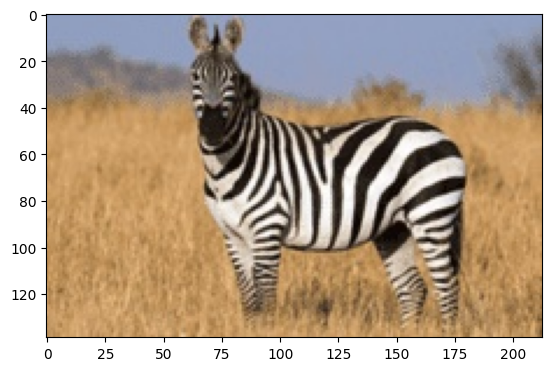

In [62]:
image = cv2.imread('../datasets/super_resolution_sample.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

print(image.shape)
plt.imshow(image_rgb)

(556, 852, 3)


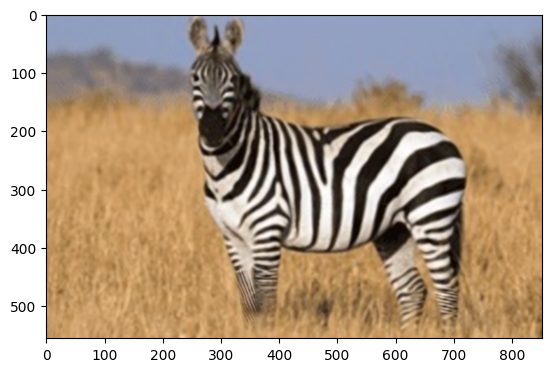

In [63]:
sr = cv2.dnn_superres.DnnSuperResImpl_create()

path = "../model/EDSR_x4.pb"
sr.readModel(path)
sr.setModel("edsr",4)

edsr = sr.upsample(image_rgb)

print(edsr.shape)
plt.imshow(edsr)


(1112, 1704, 3)


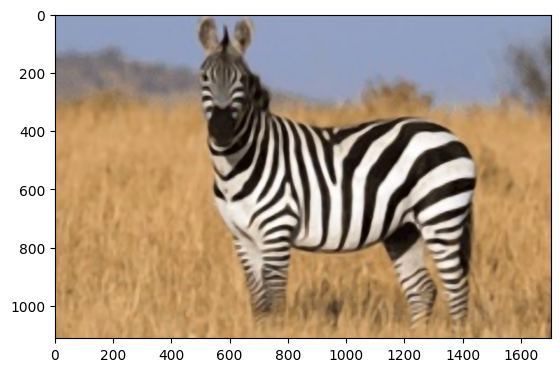

In [64]:
path = "../model/LapSRN_x8.pb"
sr.readModel(path)
sr.setModel("lapsrn",8)

lapsrn = sr.upsample(image_rgb)
print(lapsrn.shape)
plt.imshow(lapsrn)

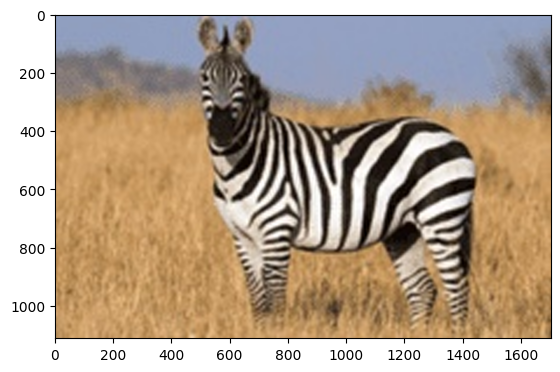

In [65]:
bicubic = cv2.resize(image_rgb, (lapsrn.shape[1], lapsrn.shape[0]), interpolation=cv2.INTER_CUBIC)
plt.imshow(bicubic)